<ipython-input-2-decac80b61e2>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")


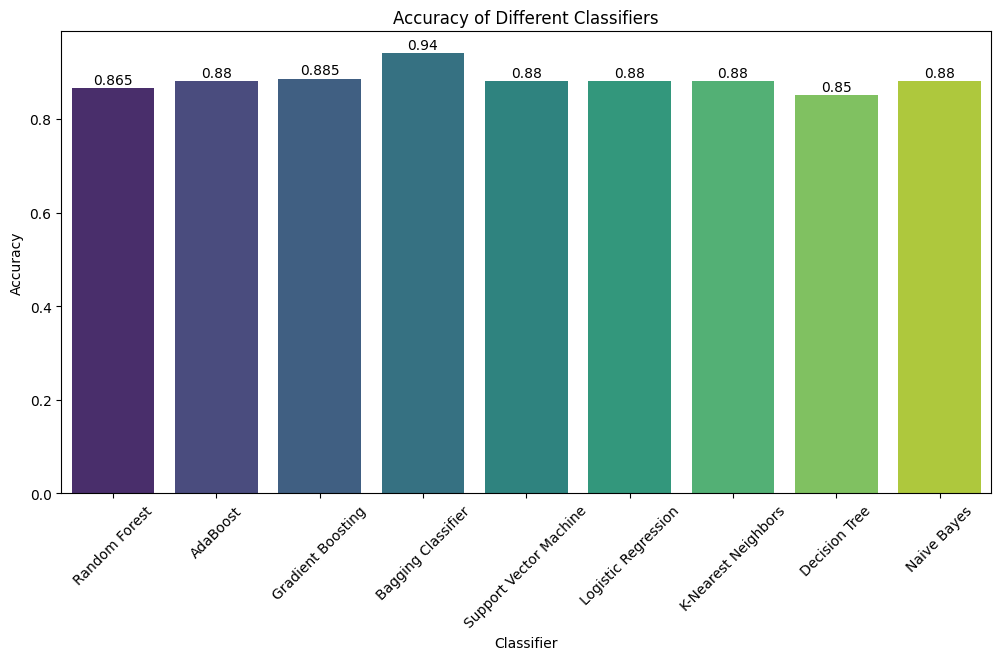

<ipython-input-2-decac80b61e2>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=list(accuracy_scores.values()), inner="points", palette="muted")


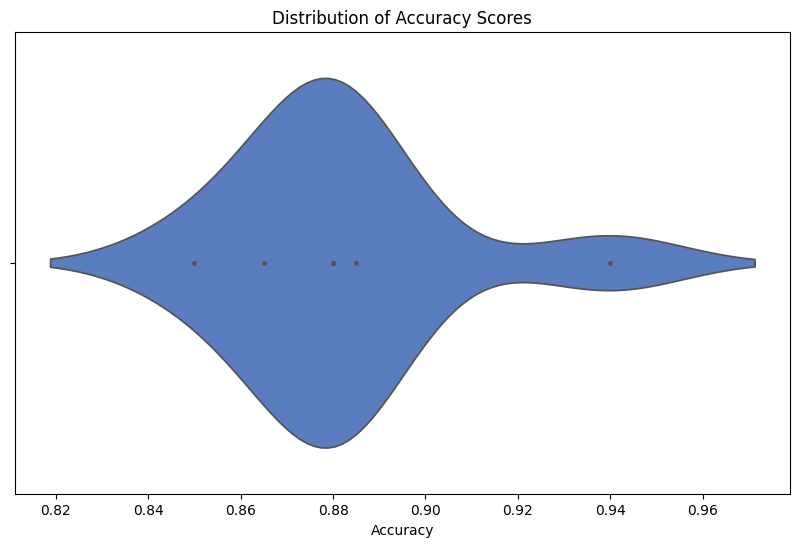

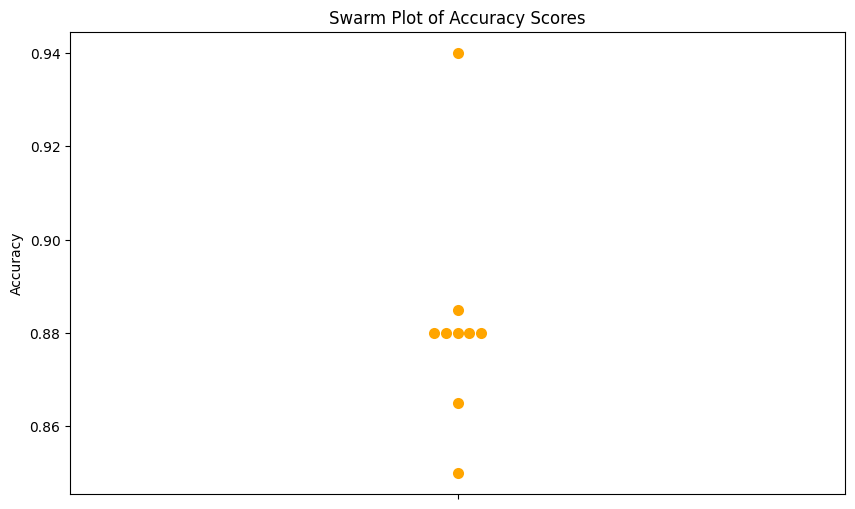

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('/content/reduced_dataset.csv')

# Define features and target variable
X = data[['user_id_length', 'purchase_value', 'country_encoded']]
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store accuracy scores for each algorithm
accuracy_scores = {}

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train classification algorithms
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    # Add more algorithms as needed
}

# Loop through each classifier, train it, and calculate accuracy
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Add your accuracy for the Bagging Classifier
accuracy_scores['Bagging Classifier'] = 0.94  # Add your accuracy here

# Plotting the accuracy scores as a bar plot with values displayed on bars
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
for i, v in enumerate(list(accuracy_scores.values())):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center')

plt.show()

# Plotting the accuracy scores as a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=list(accuracy_scores.values()), inner="points", palette="muted")
plt.xlabel('Accuracy')
plt.title('Distribution of Accuracy Scores')
plt.show()

# Plotting the accuracy scores as a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(y=list(accuracy_scores.values()), color="orange", size=8)
plt.ylabel('Accuracy')
plt.title('Swarm Plot of Accuracy Scores')
plt.show()
